<a id='p-desc'></a>
## Problem Description<br>

I analyse the UCI credit card default dataset available at: https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients#.

The dataset is details of credit card holders of an "important bank in Taiwan" for the period April to September, 2005. The features available include some basic customer demographics (gender, education, marital status and age), available credit line, their history of payment/default for the six months mentioned (Apr--Sep '05), their bill amounts and their payment amounts for that period and a binary target variable indicating default the following month.

The data was originally studied by the authors of the paper: Yeh, I. C., & Lien, C. H. (2009). The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients. Expert Systems with Applications, 36(2), 2473-2480.

I perform some EDA to understand the data and clean the data, engineer relevant features, build predictive models to predict default and perform some statistical analyses to obtain a greater understanding of the features and their interactions. I finish with some business case scenarios where the predictive model could be applied.

### Dataset

There are 25 variables in the dataset. They are:

* **ID**: ID of each client
* **LIMIT_BAL**: Amount of given credit in NT dollars (includes individual and family/supplementary credit)
* **SEX**: Gender (1=male, 2=female)
* **EDUCATION**: (1=graduate school, 2=university, 3=high school, 4=others)
* **MARRIAGE**: Marital status (1=married, 2=single, 3=others)
* **AGE**: Age in years
* **PAY_0**: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
* **PAY_2**: Repayment status in August, 2005 (scale same as above)
* **PAY_3**: Repayment status in July, 2005 (scale same as above)
* **PAY_4**: Repayment status in June, 2005 (scale same as above)
* **PAY_5**: Repayment status in May, 2005 (scale same as above)
* **PAY_6**: Repayment status in April, 2005 (scale same as above)
* **BILL_AMT1**: Amount of bill statement in September, 2005 (NT dollar)
* **BILL_AMT2**: Amount of bill statement in August, 2005 (NT dollar)
* **BILL_AMT3**: Amount of bill statement in July, 2005 (NT dollar)
* **BILL_AMT4**: Amount of bill statement in June, 2005 (NT dollar)
* **BILL_AMT5**: Amount of bill statement in May, 2005 (NT dollar)
* **BILL_AMT6**: Amount of bill statement in April, 2005 (NT dollar)
* **PAY_AMT1**: Amount of payment in September, 2005 (NT dollar)
* **PAY_AMT2**: Amount of payment in August, 2005 (NT dollar)
* **PAY_AMT3**: Amount of payment in July, 2005 (NT dollar)
* **PAY_AMT4**: Amount of payment in June, 2005 (NT dollar)
* **PAY_AMT5**: Amount of payment in May, 2005 (NT dollar)
* **PAY_AMT6**: Amount of payment in April, 2005 (NT dollar)
* **default payment next month**: The target variable indicating default of payment (1=default, 0=non-default)

Some comments:

- It is not made clear as to exactly what the target indicates (default next month): it could be that the customer fails to make any payment, the customer fails to make the minimum payment or the customer fails to make the entire payment. Since there is no clarification possible, I will assume that default here indicates that the customer fails to make the minimum payment.

- The data description mentions bill statement amounts for a month and amount of payment in the same month. Usually, a bill statement for the month of May, 2005 is paid in June, 2005. I could make an informed guess by carefully looking at the amounts but I will assume that the payment in June 2005 is going towards the payment of the bill for June 2005.

- The credit limit of a person is said to include individual and family/supplemental credit. It is not clear if the bills are listed by individual or family as that could impact the data. Also, it is surprising that nobody's credit limit changed in the six month period considered but it could be a simplification introduced by the data set creator.

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df =pd.read_csv(r"C:\Credit_Prediction\notebooks\data\UCI_Credit_Card.csv")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [11]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [13]:
df.columns = [i.lower() for i in list(df.columns)]


In [14]:
df["sex"].unique()

array([2, 1], dtype=int64)

In [16]:
df["education"].unique()

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

<Figure size 1000x1800 with 0 Axes>

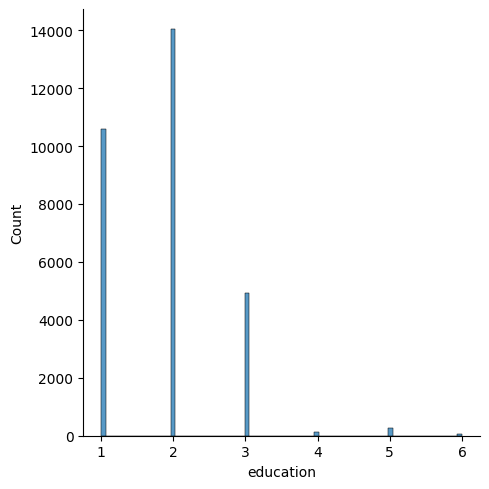

In [19]:
df['education'].replace(0,1,inplace=True)
plt.figure(figsize=(10,18))
sns.displot(df["education"])
plt.show()

<Figure size 1000x1800 with 0 Axes>

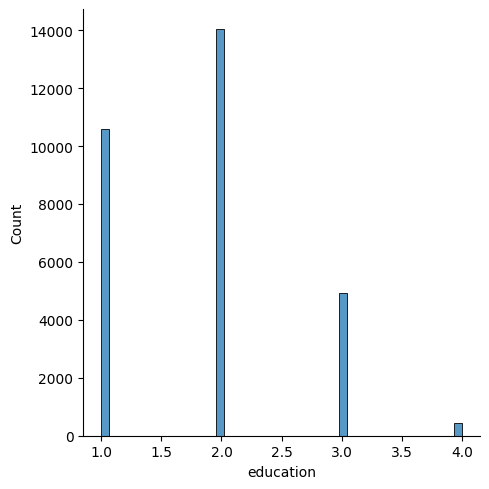

In [20]:
df['education'] = df['education'].replace({5:4, 6:4})
plt.figure(figsize=(10,18))
sns.displot(df["education"])
plt.show()

In [22]:
df.rename(columns={"pay_0":"pay_1","default.payment.next.month":"default_pay"},inplace=True)
df

,id,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default_pay
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [23]:
df=df.drop('id',axis=1)

<Axes: >

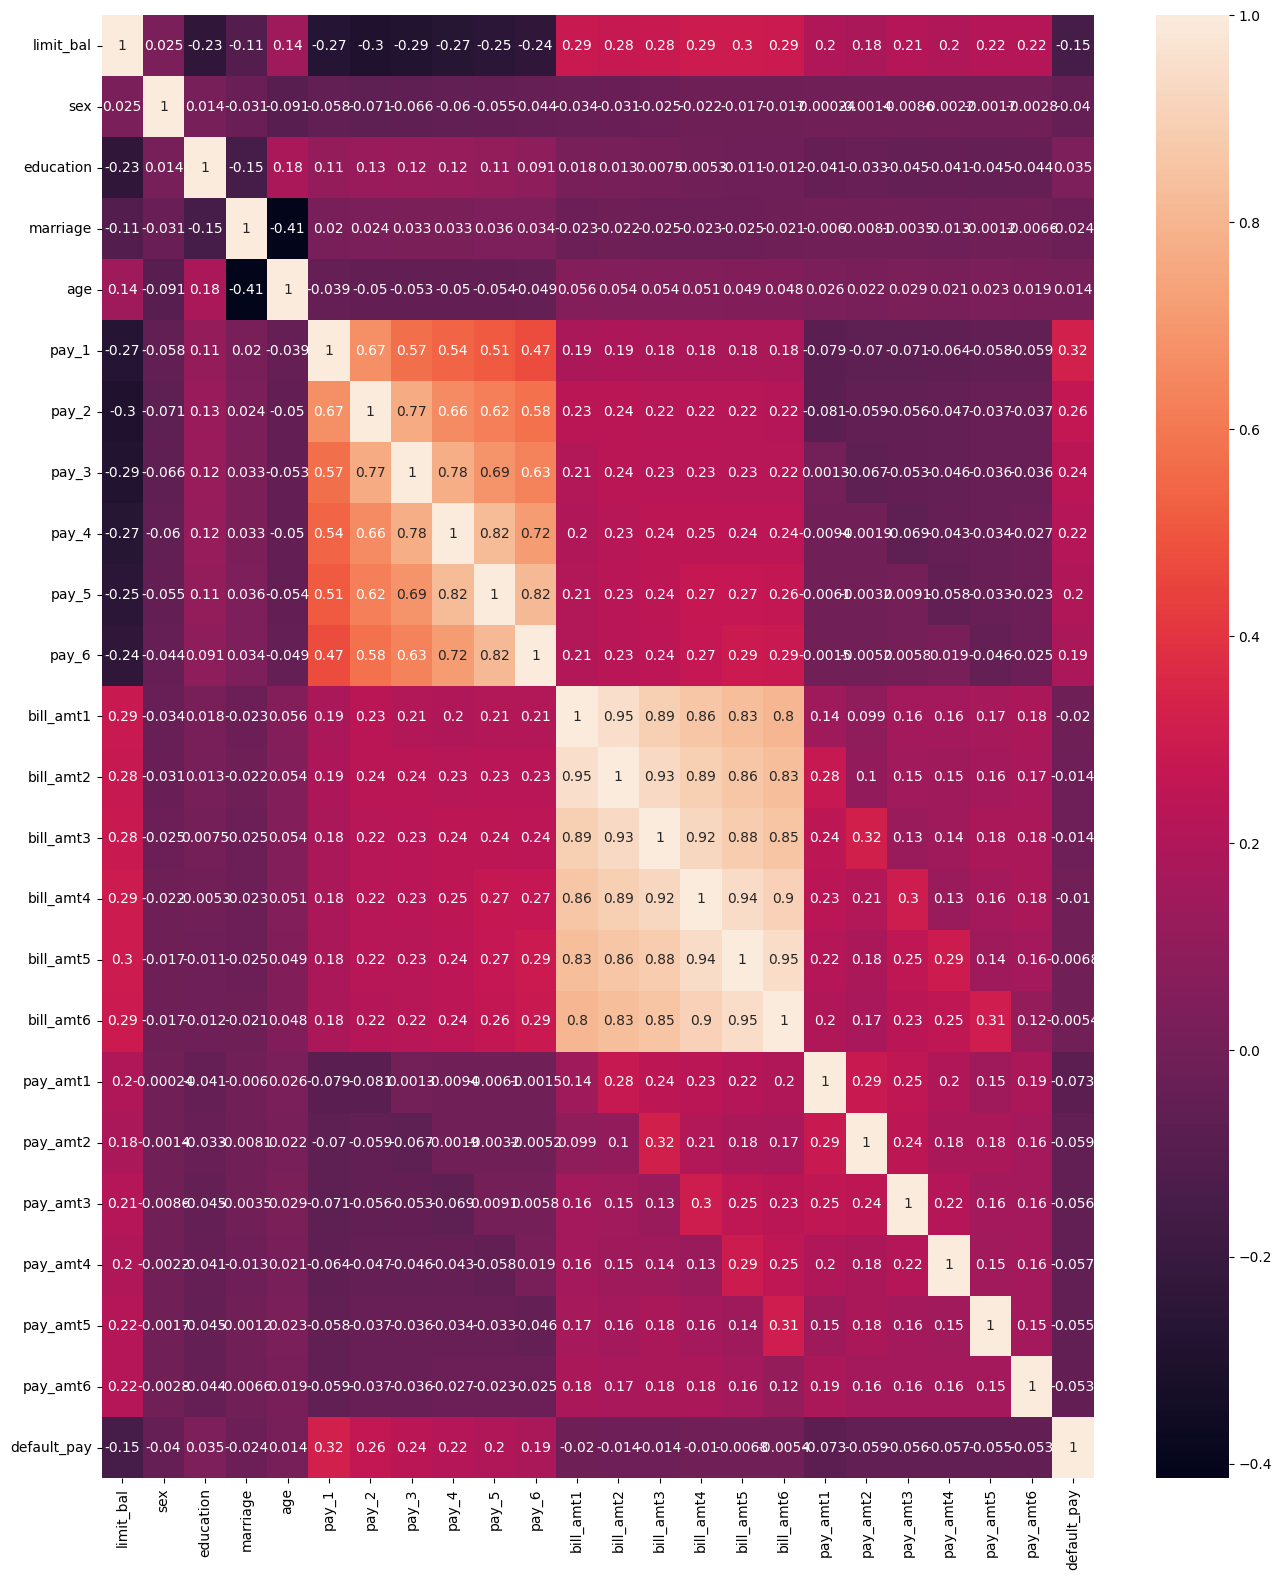

In [31]:
plt.figure(figsize=(16,19))
sns.heatmap(df.corr(),annot=True)

In [33]:
df.isnull().sum()

limit_bal      0
sex            0
education      0
marriage       0
age            0
pay_1          0
pay_2          0
pay_3          0
pay_4          0
pay_5          0
pay_6          0
bill_amt1      0
bill_amt2      0
bill_amt3      0
bill_amt4      0
bill_amt5      0
bill_amt6      0
pay_amt1       0
pay_amt2       0
pay_amt3       0
pay_amt4       0
pay_amt5       0
pay_amt6       0
default_pay    0
dtype: int64